<h1><center> TP d’Initiation au Traitement du Signal </center></h1>

<h2><center>Consignes</center></h2>
 
1. Le fichier .ipynb doit être enregistré sous la forme: *votre_Nom_Prenom.ipynb* et être déposé sous Moodle.
1.Chacune de vos réponses aux questions doit avoir un code source et des résultats numériques ou des images et/ou bien des commentaires associés.
***

In [3]:
import scipy.io.wavfile as wav
import numpy as np
import matplotlib.pyplot as plt

<h3><center>EXERCICE 1 : ÉCHANTILLONNAGE</center></h3>

On considère le signal analogique $y(t) = cos(2πf0t)$ avec $t$ $∈$ $R$, et $f0 = 3kHz$. On échantillonne $y(t)$ à la fréquence $fe$.
Soit $ye(n)$ le signal ainsi échantillonné.

1) On fixe $fe = 10kHz$. Représenter le signal temporel et le module de sa transformée de Fourier sur deux figures différentes.

In [2]:
def draw_signal_infos(y, f0, fe):
    Te = 1/fe

    n = np.arange(0, 50)
    nTe = n*Te

    ye = y(nTe, f0)

    plt.plot(nTe, ye)
    plt.show()

    freq = np.fft.fftshift(np.fft.fftfreq(len(n), Te))
    Ye = np.fft.fftshift(np.fft.fft(ye))

    plt.plot(freq, np.abs(Ye))
    plt.show()

In [3]:
def y(t, f0):
    return np.cos(2*np.pi*f0*t)

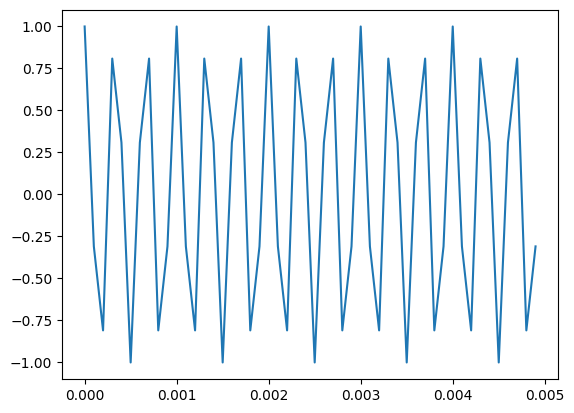

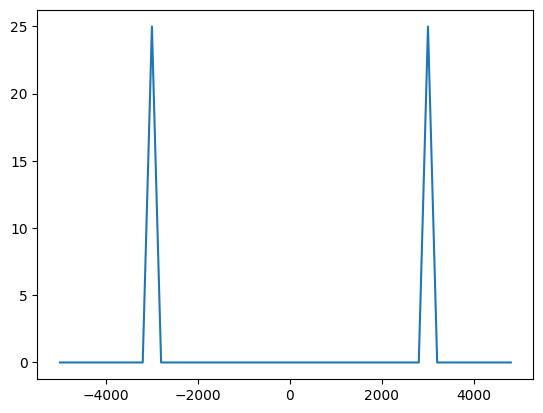

In [4]:
draw_signal_infos(y, 3000, 10000)

2) On fixe $fe = 4kHz$. Représenter le signal temporel et le module de sa transformée de Fourier sur deux figures différentes. Conclure.

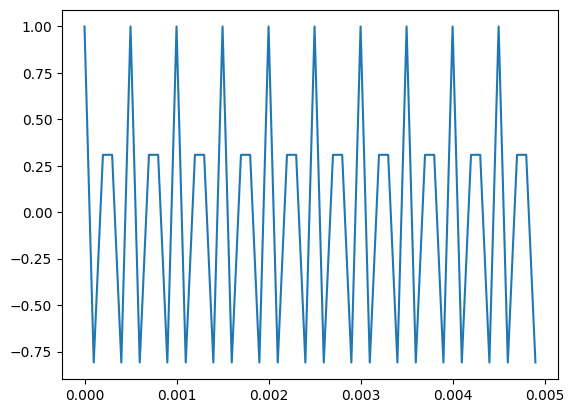

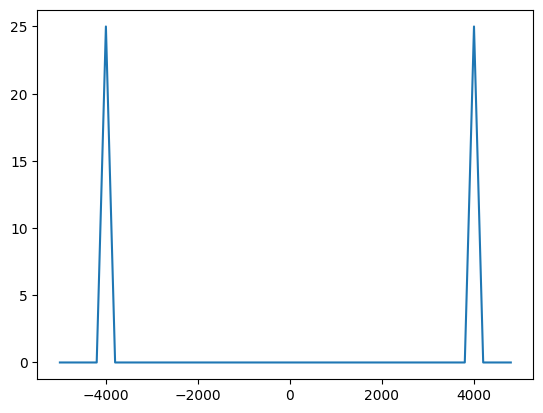

In [5]:
draw_signal_infos(y, 4000, 10000)

*Commentaires (fréquence d'échantillonnage)*: 

3) Charger, à l’aide de scipy.io.wavfile, le son "handel" qui a été échantillonné à la fréquence d’échantillonnage $fe = 8192Hz$ et quantifié sur 16 bits.

In [6]:
fs, signal = wav.read('handel.wav')

4) Sous-échantillonner le signal sonore précédent d’un facteur 2 et écoutez-le. Conclure sur les effets du sous-échantionllonnage.

In [7]:
subsignal = []

i = 0
for v in signal:
    if i % 2 == 0:
        subsignal.append(v)
    
    i += 1

subsignal = np.array(subsignal)

#

wav.write('handel2.wav', int(fs/2), subsignal.astype(np.int16))

*Commentaires (effets du sous-échantionllonnage)*:

5) Sur-échantillonner le signal sonore précédent d’un facteur 2 et écoutez-le. Conclure sur les effets du sur-échantionllonnage.

In [8]:
oversignal = []

for v in signal:
    oversignal.append(v)
    oversignal.append(0)

oversignal = np.array(oversignal)

#

wav.write('handel3.wav', int(2*fs), oversignal.astype(np.int16))

*Commentaires (effets du sur-échantionllonnage)*: 

***

<h3><center>EXERCICE 2 : TRANSFORMÉE DE FOURIER ET FILTRAGE</center></h3>

Soit le signal $x(n) = (1/2)^n$  $u(n)$, avec $u(n)$ l’échelon unité. 

1) Calculer $X(f)$ la transformée de Fourier de $x(n)$, avec $n = −128, ..., −1, 0, 1, 2, ..., 128$. Représenter le module et la phase de $X(f)$. On rappelle que $f$ $∈$ $[$−1/2$,  $1/2$]$



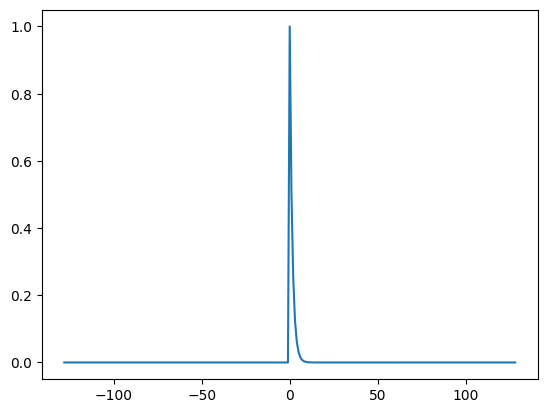

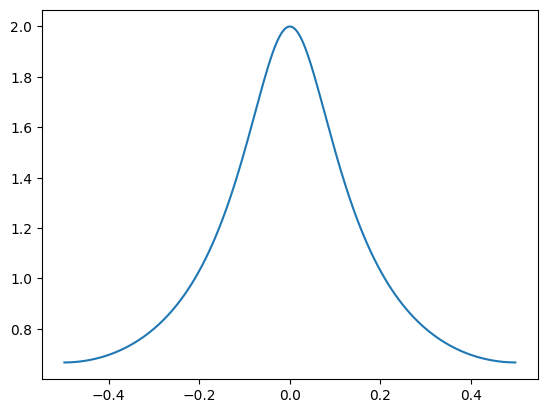

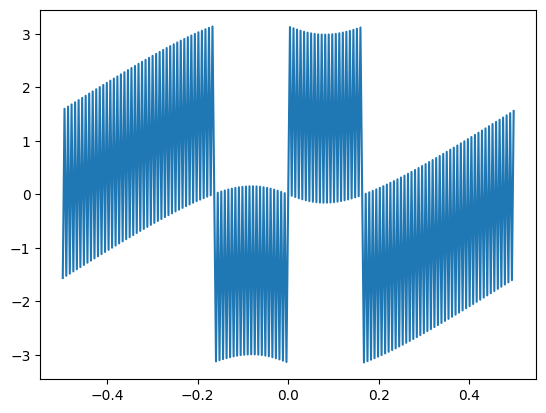

In [9]:
def x(n):
    return np.array([(1/2)**n_v * (1 if n_v >= 0 else 0) for n_v in n])

#

n = np.arange(-128, 128 +1, 1)
freq = np.fft.fftshift(np.fft.fftfreq(len(n)))
xn = x(n)
Xf = np.fft.fftshift(np.fft.fft(xn))

plt.plot(n, xn)
plt.show()

plt.plot(freq, np.abs(Xf))
plt.show()

plt.plot(freq, np.angle(Xf))
plt.show()

2) Quelle est la nature (passe-haut, bas, bande) de ce filtre?

> passe-bas

3) On considère un filtre passe-bas idéal de fréquence de coupure 1/4. Représenter le module (dans le domaine de Fourier) de ce filtre.


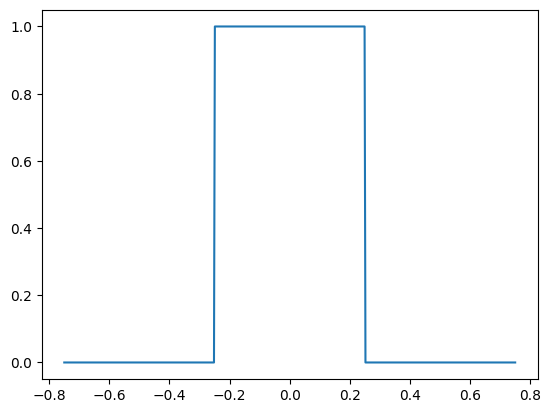

In [10]:
def perfectLowFilter(freq, fc):
    return np.array([np.abs(f) <= fc for f in freq])

#

fc = 1/4

freq = np.linspace(-fc*3, fc*3, 512+1)
Xf = perfectLowFilter(freq, fc)
plt.plot(freq, np.abs(Xf))

Soit $y(n) = cos(2πf1n)+cos(2πf2n)+cos(2πf3n)$, avec $n = −128, ..., −1, 0, 1, 2, ..., 128$ et $f1 = 1/5$, $f2 = 1/3$, $f3 = 2/5$.

4) Représenter y(n).

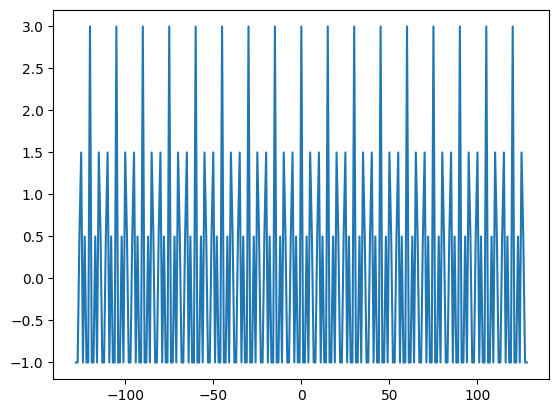

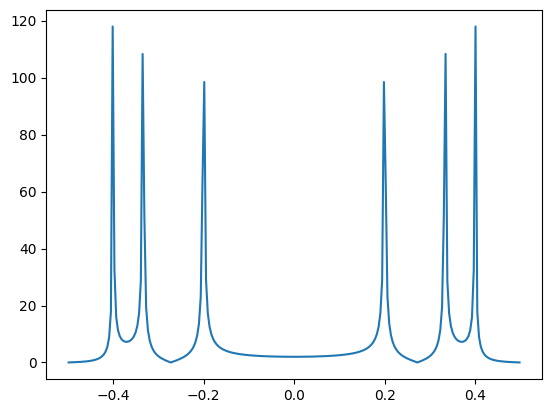

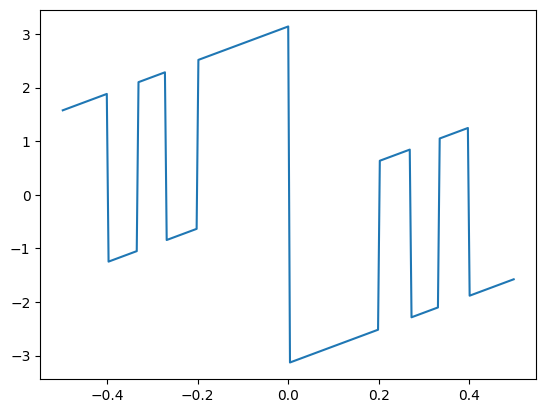

In [11]:
def y(n, f1, f2, f3):
    return np.array([np.array([np.cos(2*np.pi*f*n_v) for f in [f1, f2, f3]]).sum() for n_v in n])

#

f1 = 1/5
f2 = 1/3
f3 = 2/5

n = np.arange(-128, 128 +1, 1)
freq = np.fft.fftshift(np.fft.fftfreq(len(n)))
yn = y(n, f1, f2, f3)
Yf = np.fft.fftshift(np.fft.fft(yn))

plt.plot(n, yn)
plt.show()

plt.plot(freq, np.abs(Yf))
plt.show()

plt.plot(freq, np.angle(Yf))
plt.show()

5) Quelle est la fréquence d’échantillonnage à laquelle est échantillonné le signal $y(n)$ ?

> Par identification: $n \times Te = n \times 1 \Leftrightarrow Te = 1 \Leftrightarrow fe = 1$

6) On souhaite éliminer les fréquences $f2$ et $f3$.
Donner la nature et la fréquence de coupure du filtre à utiliser.

Puisque supprimer f2 et f3 revient à garder f1, on peut appliquer un filtre passe-bas.

7) Réaliser le filtrage. Afficher le signal filtré temporel et sa transformée de Fourier sur deux figures différentes. Conclure.

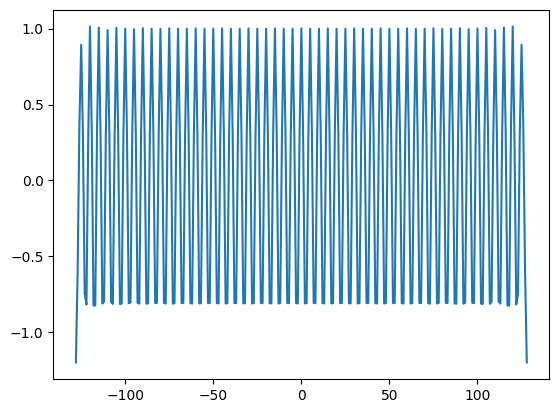

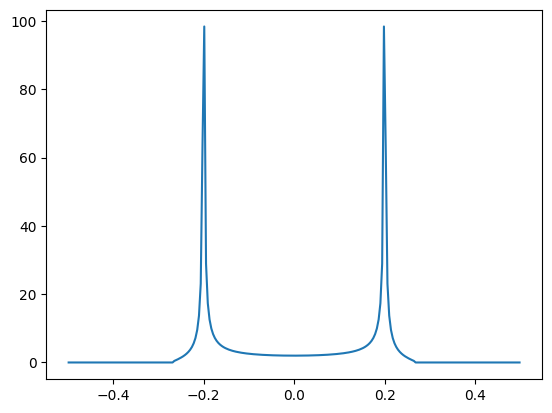

In [12]:
n = np.arange(-128, 128 +1, 1)
freq = np.fft.fftshift(np.fft.fftfreq(len(n)))

Yf_filtered = Yf * perfectLowFilter(freq, (f1+f2)/2)
yn_filtered = np.real(np.fft.ifft(np.fft.ifftshift(Yf_filtered)))

plt.plot(n, yn_filtered)
plt.show()

plt.plot(freq, np.abs(Yf_filtered))
plt.show()

*Commentaires*: 

8) Comment modifier le filtre passe-bas idéal pour éliminer $f1$ ?

> On doit appliquer un filtre $F = 1 - F0$ avec $F0$ notre filtre passe-bas idéal.

9) Réaliser le filtrage. Afficher le signal filtré temporel et sa transformée de Fourier sur deux figures différentes. Conclure.

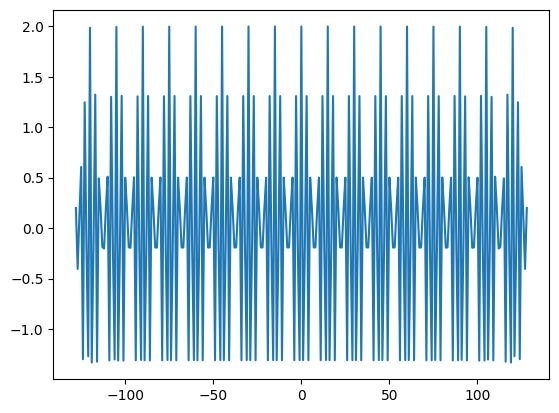

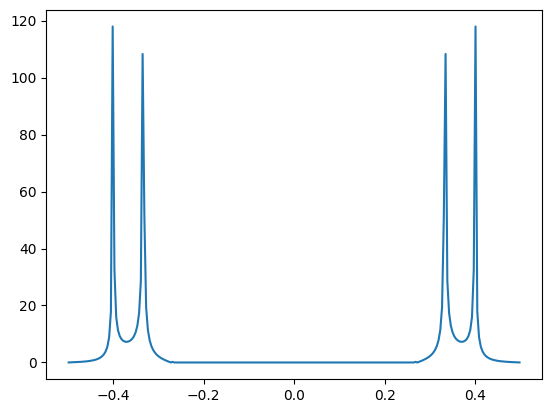

In [13]:
n = np.arange(-128, 128 +1, 1)
freq = np.fft.fftshift(np.fft.fftfreq(len(n)))

Yf_filtered2 = Yf * (1-perfectLowFilter(freq, (f1+f2)/2))
yn_filtered2 = np.real(np.fft.ifft(np.fft.ifftshift(Yf_filtered2)))

plt.plot(n, yn_filtered2)
plt.show()

plt.plot(freq, np.abs(Yf_filtered2))
plt.show()

*Commentaires*: 

***

<h3><center>EXERCICE 3 : FILTRAGE D’UN SIGNAL SONORE</center></h3>

Charger, à l’aide de scipy.io.wavfile, le son "handel" qui a été échantillonné à la fréquence d’échantillonnage $fe = 8192Hz$ et quantifié sur 16 bits.

In [25]:
handel_fe, handel_sig = wav.read('handel.wav')

print(handel_fe)

8192


1) Quelle est la durée en secondes de ce signal sonore ?

In [26]:
length = len(handel_sig) / handel_fe
print(f"{length}s")

8.9249267578125s


2) Calculer et afficher le module de la transformée de Fourier de ce signal sonore.

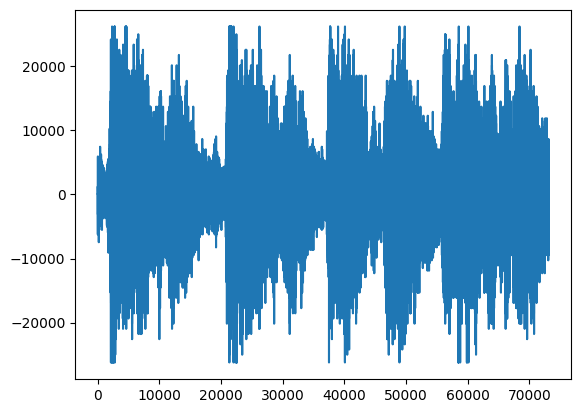

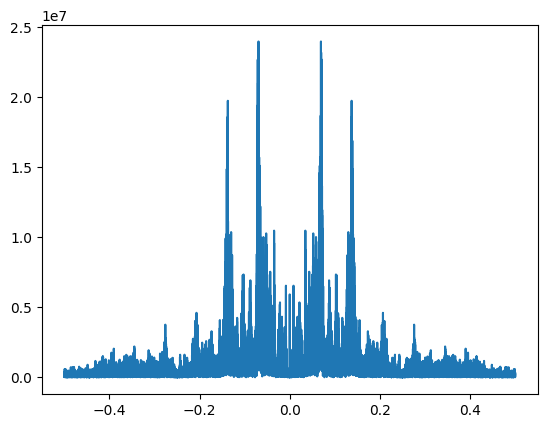

In [54]:
n = np.arange(0, len(handel_sig))
freq = np.fft.fftshift(np.fft.fftfreq(len(n)))

handel_sig_fft = np.fft.fftshift(np.fft.fft(handel_sig))

plt.plot(n, handel_sig)
plt.show()

plt.plot(freq, np.abs(handel_sig_fft))
plt.show()

3) Générer un signal sinusoïdal, de fréquence 3 kHz, échantillonné à $fe = 8192Hz$, et de la même durée que le signal sonore "handel".

In [15]:
def cossig(t, f):
    return np.cos(2*np.pi*f*t)

In [16]:
def sigech(sig, n, fe):
    return sig(n*(1/fe))

4) Additionner ce signal sinusoïdal au signal handel et écouter le signal résultant.

In [23]:
n = np.arange(0, len(handel_sig))

result_sig = handel_sig + sigech(lambda t : 1e4 * cossig(t, 3000), n, handel_fe)

wav.write('handel_with_cossig.wav', handel_fe, result_sig.astype(np.int16))

5) Calculer et afficher le module de la transformée de Fourier du signal résultant.

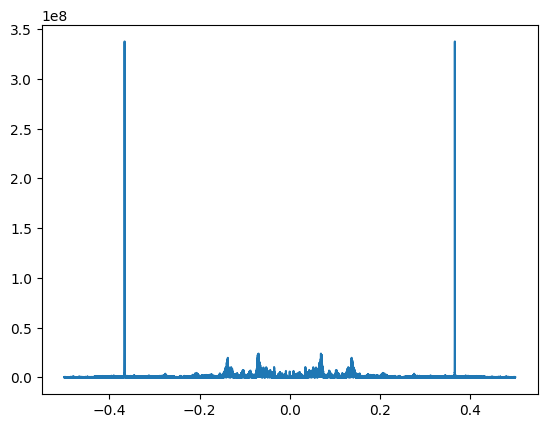

In [75]:
n = np.arange(0, len(result_sig))
freq = np.fft.fftshift(np.fft.fftfreq(len(n)))

result_sig_fft = np.fft.fftshift(np.fft.fft(result_sig))

plt.plot(freq, np.abs(result_sig_fft))
plt.show()

6) Proposer une méthode pour filtrer le signal cosinus. Mettez-la en oeuvre et écouter le signal filtré.

> Le signal étant bruité par un cosinus d'une fréquence précise et ayant une amplitude marquée, on peut identifier, d'une part, graphiquement, d'autre part, par le calcul, que la fréquence à filtrer correspond à celle ayant la valeur la plus haute dans la transformée de fourrier.
>
> Autrement dit, $ fc = \underset{f\ \ge\ 0}{argmax}\ TF_s(f) $
>
> De plus, puisque l'on cherche à filtrer une fréquence ciblée, on peut se ramener à un filtre passe-bande avec un intervalle très court autour de la fréquence cible.

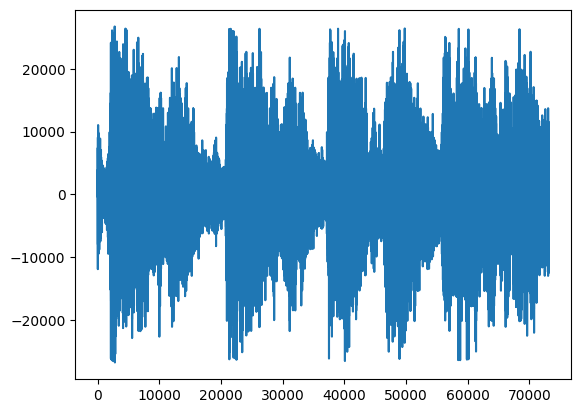

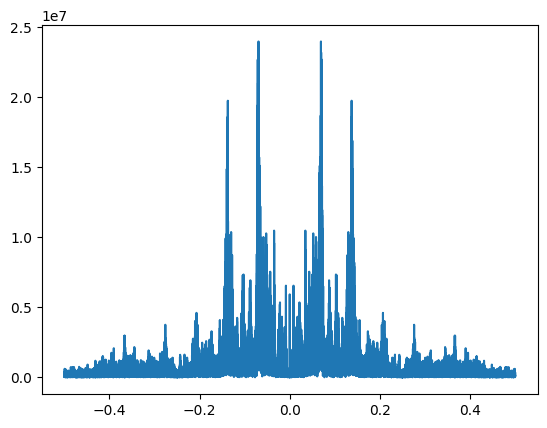

In [123]:
n = np.arange(0, len(result_sig))
freq = np.fft.fftshift(np.fft.fftfreq(len(n)))

fc = np.abs(freq[np.abs(result_sig_fft).argmax()])
fc_delta = 0.001
result_sig_fft_filtered = result_sig_fft * (perfectLowFilter(freq, fc*(1-fc_delta)) + (1-perfectLowFilter(freq, fc*(1+fc_delta))))
result_sig_filtered = np.real(np.fft.ifft(np.fft.ifftshift(result_sig_fft_filtered)))

plt.plot(n, result_sig_filtered)
plt.show()

plt.plot(freq, np.abs(result_sig_fft_filtered))
plt.show()

7) Bruitez le signal sonore "handel" par un bruit Gaussien, additif, de moyenne nulle et d’écart-type 0, 5. Ecoutez le signal résultant.

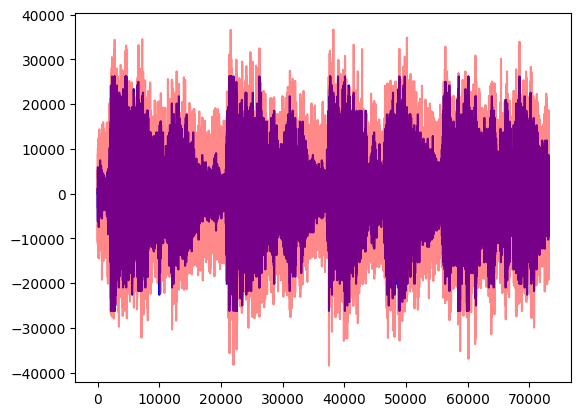

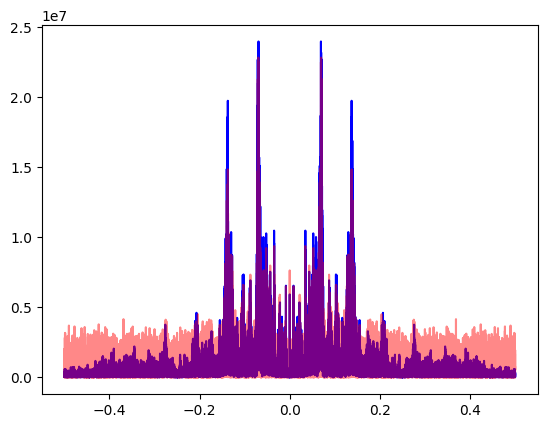

In [171]:
n = np.arange(0, len(handel_sig))
freq = np.fft.fftshift(np.fft.fftfreq(len(n)))

result_sig2 = handel_sig + 1e4 * np.random.normal(0, 0.5, signal.size)
result_sig2_fft = np.real(np.fft.fftshift(np.fft.fft(result_sig2)))

plt.plot(n, handel_sig, color='blue')
plt.plot(n, result_sig2, color='#ff000077')
plt.show()

plt.plot(freq, np.abs(handel_sig_fft), color='blue')
plt.plot(freq, np.abs(result_sig2_fft), color='#ff000077')
plt.show()

wav.write('handel_with_gaussian_noise.wav', handel_fe, result_sig2.astype(np.int16))

8) Débruitez ce signal par le filtre précédent. Conclure.

> Le filtre utilisé étant adapté au filtrage d'une fréquence ciblée, cela ne correspond pas du tout à un bruit gaussien.
>
> D'après le graphe du module de la transformée de Fourier du signal bruité, il semble que le bruit se concentre surtout sur les basse fréquences.
> On peut alors essayer un filtre passe bas.

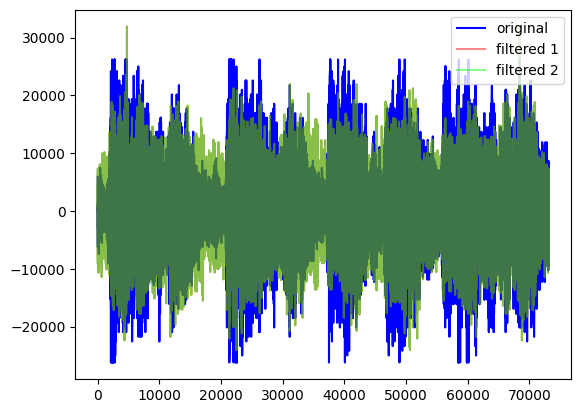

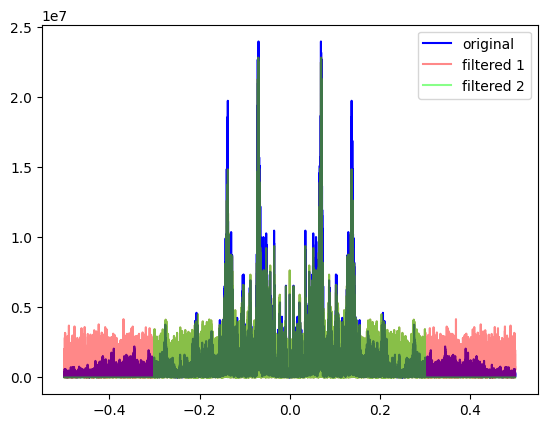

In [182]:
n = np.arange(0, len(result_sig2))
freq = np.fft.fftshift(np.fft.fftfreq(len(n)))

result_sig2_fft_filtered1 = result_sig2_fft * (perfectLowFilter(freq, fc*(1-fc_delta)) + (1-perfectLowFilter(freq, fc*(1+fc_delta))))
result_sig2_filtered1 = np.real(np.fft.ifft(np.fft.ifftshift(result_sig2_fft_filtered)))

result_sig2_fft_filtered2 = result_sig2_fft * perfectLowFilter(freq, 0.3)
result_sig2_filtered2 = np.real(np.fft.ifft(np.fft.ifftshift(result_sig2_fft_filtered)))

plt.plot(n, handel_sig, color='blue', label="original")
plt.plot(n, result_sig2_filtered1, color='#ff000077', label="filtered 1")
plt.plot(n, result_sig2_filtered2, color='#00ff0077', label="filtered 2")
plt.legend()
plt.show()

plt.plot(freq, np.abs(handel_sig_fft), color='blue', label="original")
plt.plot(freq, np.abs(result_sig2_fft_filtered1), color='#ff000077', label="filtered 1")
plt.plot(freq, np.abs(result_sig2_fft_filtered2), color='#00ff0077', label="filtered 2")
plt.legend()
plt.show()

wav.write('handel_with_gaussian_noise_filtered1.wav', handel_fe, result_sig2_filtered1.astype(np.int16))
wav.write('handel_with_gaussian_noise_filtered2.wav', handel_fe, result_sig2_filtered2.astype(np.int16))

> Comme attendu, le filtre précédent n'est pas efficace. De plus, le filtre passe bas n'est pas non plus très adapté.

9) Générez 100 réalisations indépendantes du signal bruité par un bruit Gaussien et écoutez la moyenne temporelle de ces 100 signaux. Conclure.

In [183]:
wav.write(
    'handel_moyenne_bruits_gaussiens.wav', fs,
    np.int16(
        np.mean(
            [
                handel_sig + 1e4 * np.random.normal(0, 0.5, signal.size)
                for _ in range(100)
            ],
            axis=0
        )
    )
)

> On constate que le bruit est quasi inexistant en utilisant cette méthode de filtrage.

***

<h3><center>EXERCICE 4 : SYNTHÈSE D’UN SIGNAL SONORE</center></h3>


1) Rechercher (sur Wikipédia par exemple) les fréquences des notes de musique de base. Par exemple, la fréquence du "do" sur "3 octave dans la gamme des tempérés" est $261,63 Hz$.

> Pour l'octave de l'exemple : 261.63Hz, 293.66Hz, 329.63Hz, 349.23Hz, 392.0Hz, 440.0Hz, 493.88Hz
sinon de manière générale, la fréquence d'une note est : f(n) = f0*2^(n/12)

2) Ecrire un programme qui joue les notes "FRERE -JAC-QUES" suivi de "DORMEZ-VOUS". On expliquera comment choisir la fréquence d’échantillonnage.

In [203]:
sfe = 44100
note_duration = 0.5 # seconds

#

def signal_note(tnote, fnote):
    return np.cos(2 * np.pi * fnote * tnote)

#

fnotes = {
    "do": 261.63,
    "re": 293.66,
    "mi": 329.63,
    "fa": 349.23,
    "sol": 392.00,
    "la": 440.00,
    "si": 493.88
}

melody = [
    fnotes["do"], fnotes["re"], fnotes["mi"], fnotes["do"], fnotes["do"], fnotes["re"], fnotes["mi"], fnotes["do"],
    fnotes["mi"], fnotes["fa"], fnotes["sol"], fnotes["sol"], fnotes["mi"], fnotes["fa"], fnotes["sol"], fnotes["sol"]
]

tnote = np.linspace(0, note_duration, int(sfe * note_duration), endpoint=False)

frere_jacques = 1e4 * np.concatenate([signal_note(tnote, fnote) for fnote in melody])

wav.write("frere-jacques.wav", sfe, np.int16(frere_jacques))

*Commentaires (fréquence d’échantillonnage)*:

3) Lire la "musique" ainsi obtenue. Répétez-la 3 fois.

In [204]:
frere_jacques_x3 = np.concatenate([frere_jacques for _ in range(0,3)])

wav.write("frere-jacques-x3.wav", sfe, np.int16(frere_jacques_x3))

4) Question facultative. Ecrire un programme qui joue la berceuse précédente entièrement.

In [7]:
def signal_note(fnote, note_duration, sfe):
    tnote = np.linspace(0, note_duration, int(sfe * note_duration), endpoint=False)
    return np.cos(2 * np.pi * fnote * tnote)

#

fnotes = {
    "sol-1": 196.00,
    "do": 261.63,
    "re": 293.66,
    "mi": 329.63,
    "fa": 349.23,
    "sol": 392.00,
    "la": 440.00,
    "si": 493.88
}

sfe = 44100

melody = [
    (fnotes["do"], 0.5), (fnotes["re"], 0.5), (fnotes["mi"], 0.5), (fnotes["do"], 0.5), (fnotes["do"], 0.5), (fnotes["re"], 0.5), (fnotes["mi"], 0.5), (fnotes["do"], 0.5),
    (fnotes["mi"], 0.5), (fnotes["fa"], 0.5), (fnotes["sol"], 1), (fnotes["mi"], 0.5), (fnotes["fa"], 0.5), (fnotes["sol"], 1),
    (fnotes["sol"], 0.375), (fnotes["la"], 0.125), (fnotes["sol"], 0.25), (fnotes["fa"], 0.25), (fnotes["mi"], 0.5), (fnotes["do"], 0.5),
    (fnotes["sol"], 0.375), (fnotes["la"], 0.125), (fnotes["sol"], 0.25), (fnotes["fa"], 0.25), (fnotes["mi"], 0.5), (fnotes["do"], 0.5),
    (fnotes["do"], 0.5), (fnotes["sol-1"], 0.5), (fnotes["do"], 1), (fnotes["do"], 0.5), (fnotes["sol-1"], 0.5), (fnotes["do"], 1),
]

frere_jacques = 1e4 * np.concatenate([signal_note(fnote, note_duration, sfe) for fnote, note_duration in melody])

wav.write("frere-jacques-full.wav", sfe, np.int16(frere_jacques))